<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/merge_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Write a program to merge two binary trees. Each node in the new tree should hold a value equal to the sum of the values of the corresponding nodes of the input trees.

If only one input tree has a node in a given position, the corresponding node in the new tree should match that input node.

##Solution:
To merge two binary trees, we need to traverse both trees simultaneously and create new nodes in the merged tree with values equal to the sum of the corresponding nodes from the input trees. When one of the trees doesn't have a corresponding node, we simply take the node from the other tree.


##Implementation:
Here's a Python program that defines a binary tree and implements the merging logic:

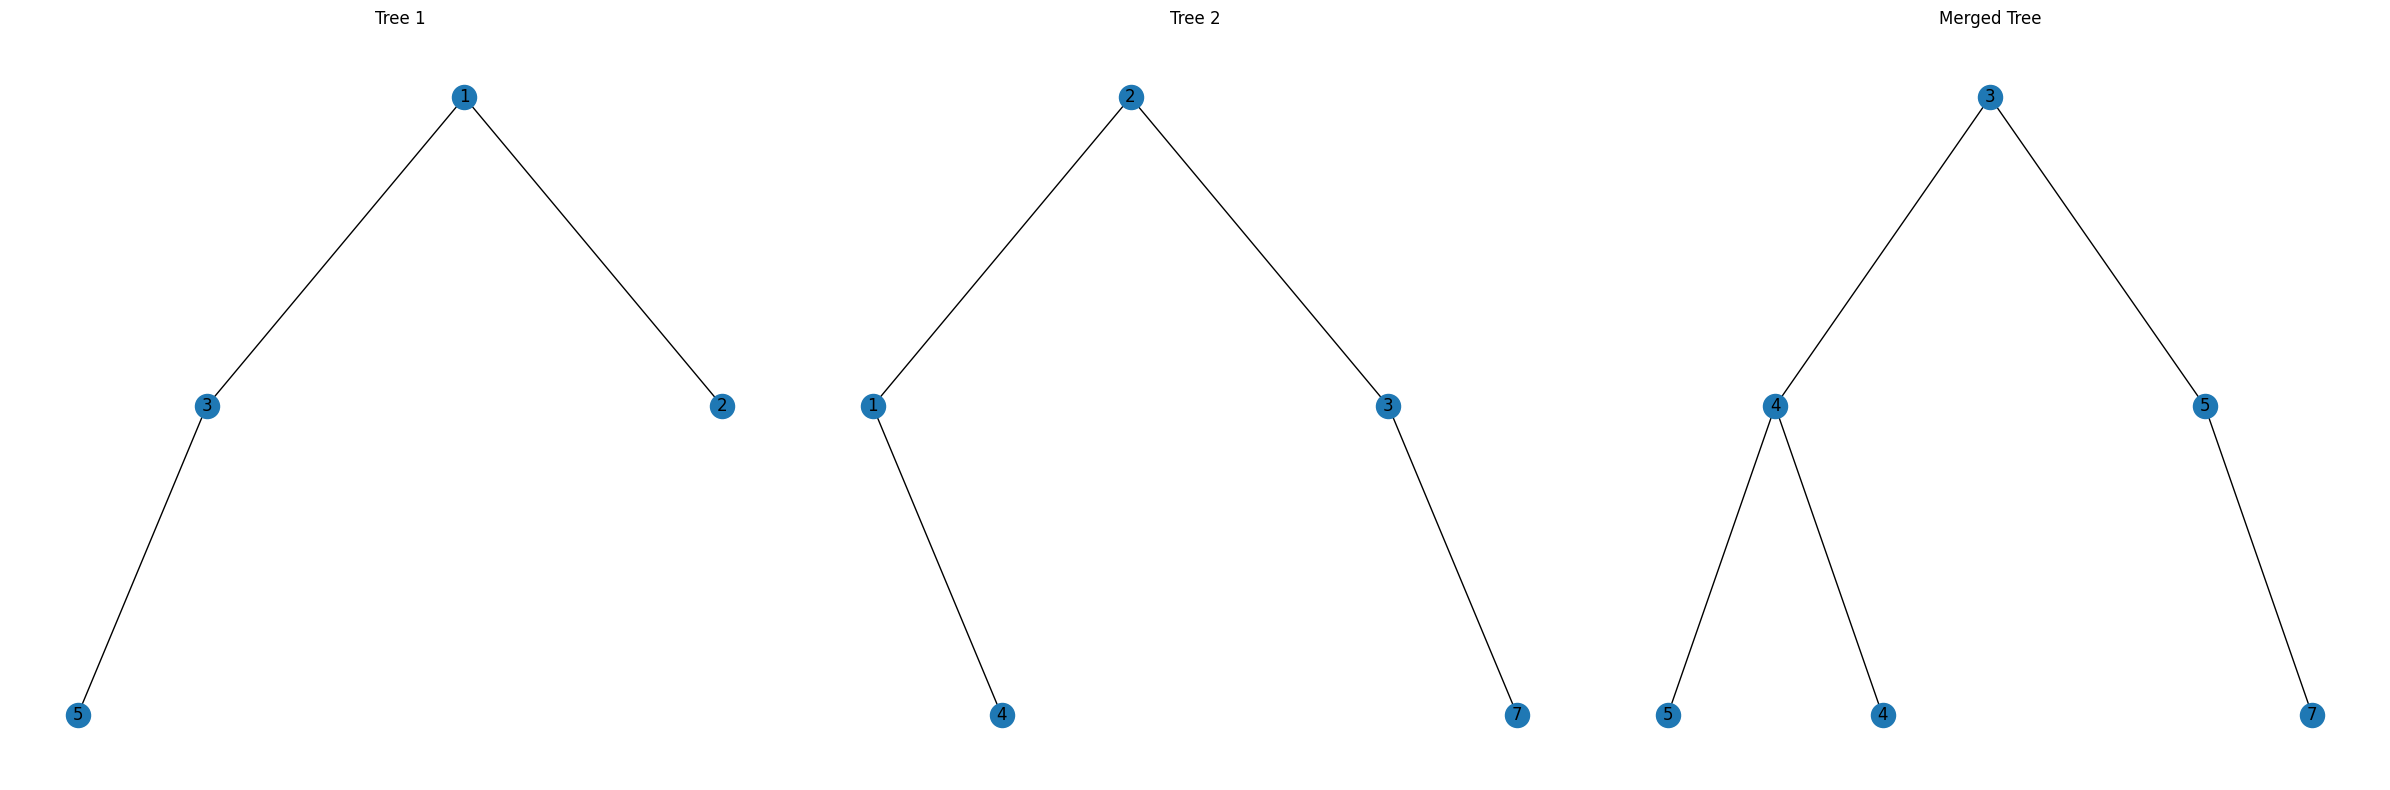

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# TreeNode class modified for compatibility with the plotting functions
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

# Function to merge trees
def merge_trees(t1, t2):
    if not t1 and not t2:
        return None
    if not t1:
        return t2
    if not t2:
        return t1
    root = TreeNode(t1.val + t2.val)
    root.left = merge_trees(t1.left, t2.left)
    root.right = merge_trees(t1.right, t2.right)
    return root

# Construct graph function to handle plotting of merged trees
def construct_graph(node, graph=None, pos=None, x=0, y=0, layer=1):
    if graph is None:
        graph = nx.DiGraph()
    if pos is None:
        pos = {}
    if node is not None:
        graph.add_node(id(node), label=node.val)
        pos[id(node)] = (x, -y)
        if node.left:
            graph.add_edge(id(node), id(node.left))
            l = x - 1 / (2 ** y)
            construct_graph(node.left, graph, pos, x=l, y=y+1, layer=layer*2)
        if node.right:
            graph.add_edge(id(node), id(node.right))
            r = x + 1 / (2 ** y)
            construct_graph(node.right, graph, pos, x=r, y=y+1, layer=layer*2)
    return graph, pos

# Updated plot_tree function to avoid creating extra figures
def plot_tree(root, title=''):
    graph, pos = construct_graph(root)
    labels = nx.get_node_attributes(graph, 'label')
    nx.draw(graph, pos, labels=labels, with_labels=True, arrows=False)
    plt.title(title)

# Example trees
t1 = TreeNode(1, TreeNode(3, TreeNode(5)), TreeNode(2))
t2 = TreeNode(2, TreeNode(1, None, TreeNode(4)), TreeNode(3, None, TreeNode(7)))

# Merge the trees
merged_tree = merge_trees(t1, t2)

# Now we will plot the trees in a single figure with subplots
plt.figure(figsize=(24, 8))

# Plot Tree 1
plt.subplot(1, 3, 1)
plot_tree(t1, "Tree 1")

# Plot Tree 2
plt.subplot(1, 3, 2)
plot_tree(t2, "Tree 2")

# Plot Merged Tree
plt.subplot(1, 3, 3)
plot_tree(merged_tree, "Merged Tree")

plt.tight_layout()
plt.show()
